<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41897 entries, 0 to 41896
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  41897 non-null  int64  
 1   age         41879 non-null  float64
 2   salary      41897 non-null  int64  
 3   balance     41897 non-null  int64  
 4   marital     41897 non-null  object 
 5   jobedu      41897 non-null  object 
 6   targeted    41897 non-null  object 
 7   default     41897 non-null  object 
 8   housing     41897 non-null  object 
 9   loan        41897 non-null  object 
 10  contact     41897 non-null  object 
 11  day         41897 non-null  int64  
 12  month       41852 non-null  object 
 13  duration    41897 non-null  object 
 14  campaign    41897 non-null  int64  
 15  pdays       41897 non-null  int64  
 16  previous    41897 non-null  int64  
 17  poutcome    41897 non-null  object 
 18  response    41867 non-null  object 
dtypes: float64(1), int64(7), 

<ipython-input-1-af2d18d57df8>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-1-af2d18d57df8>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

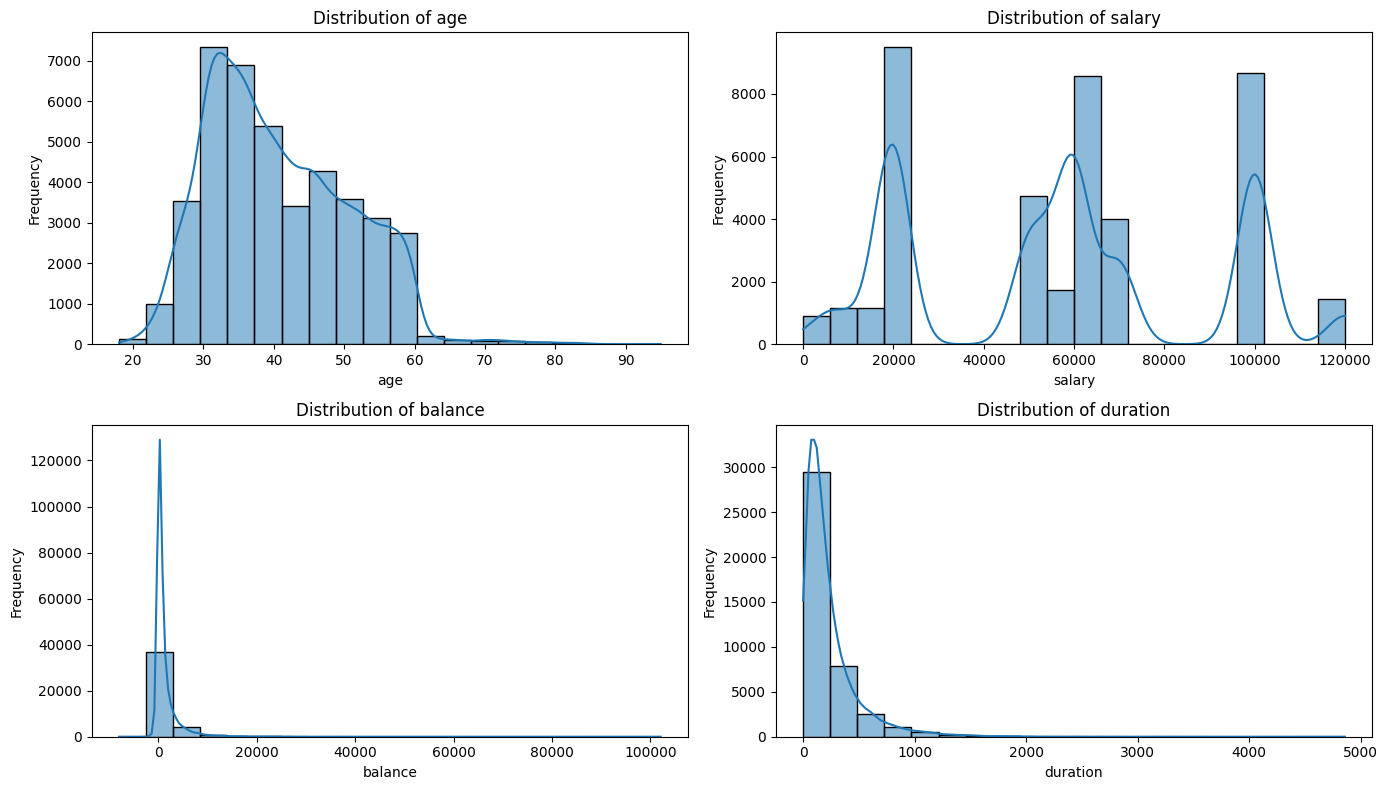

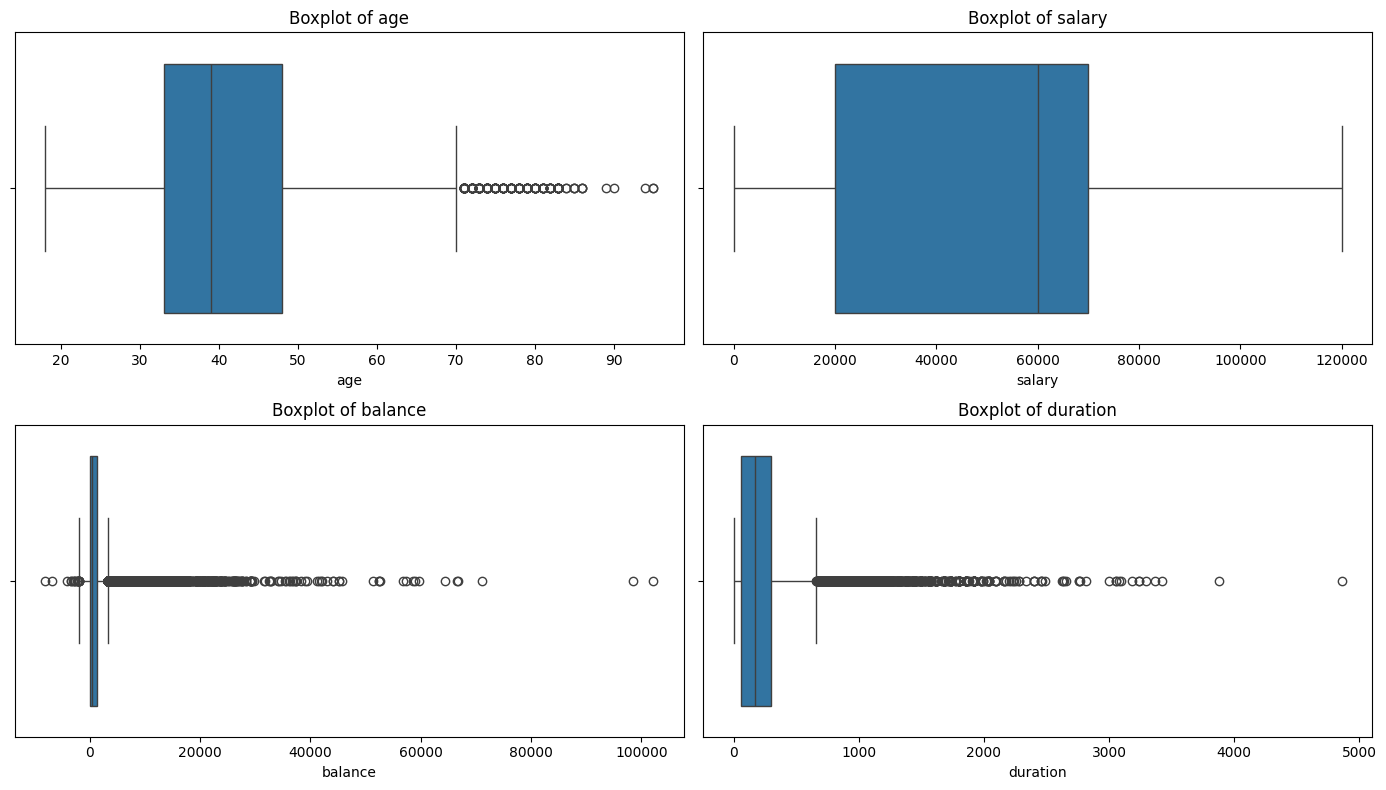

<ipython-input-1-af2d18d57df8>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')
<ipython-input-1-af2d18d57df8>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')
<ipython-input-1-af2d18d57df8>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')
<ipython-input-1-af2d18d57df8>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

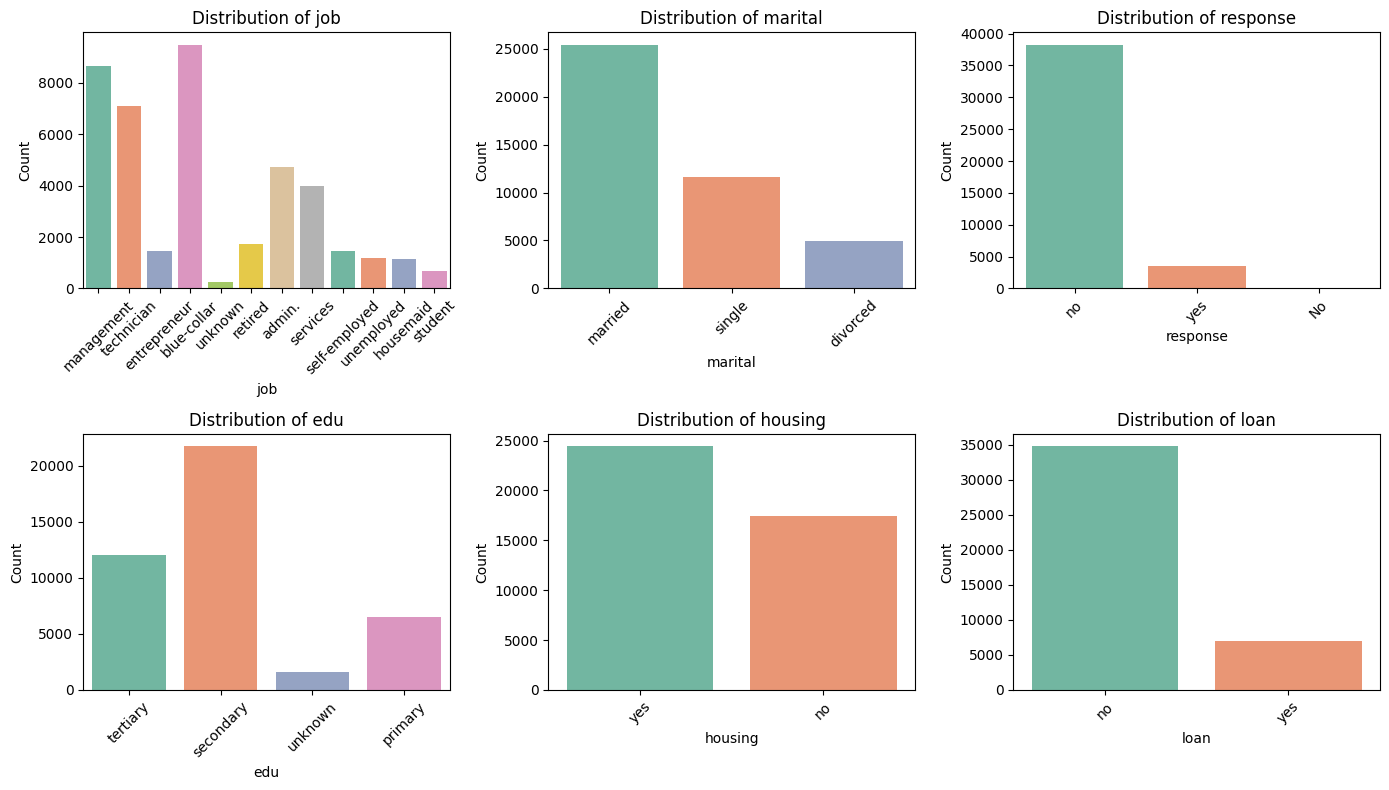

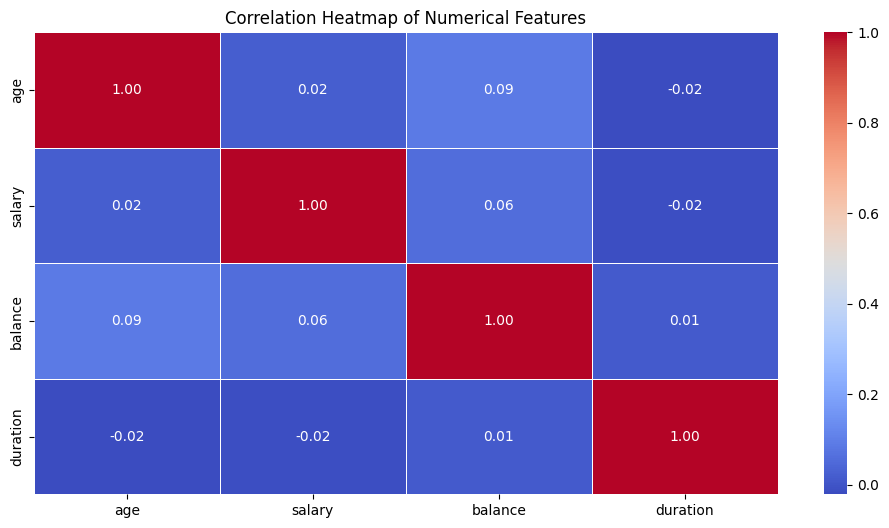

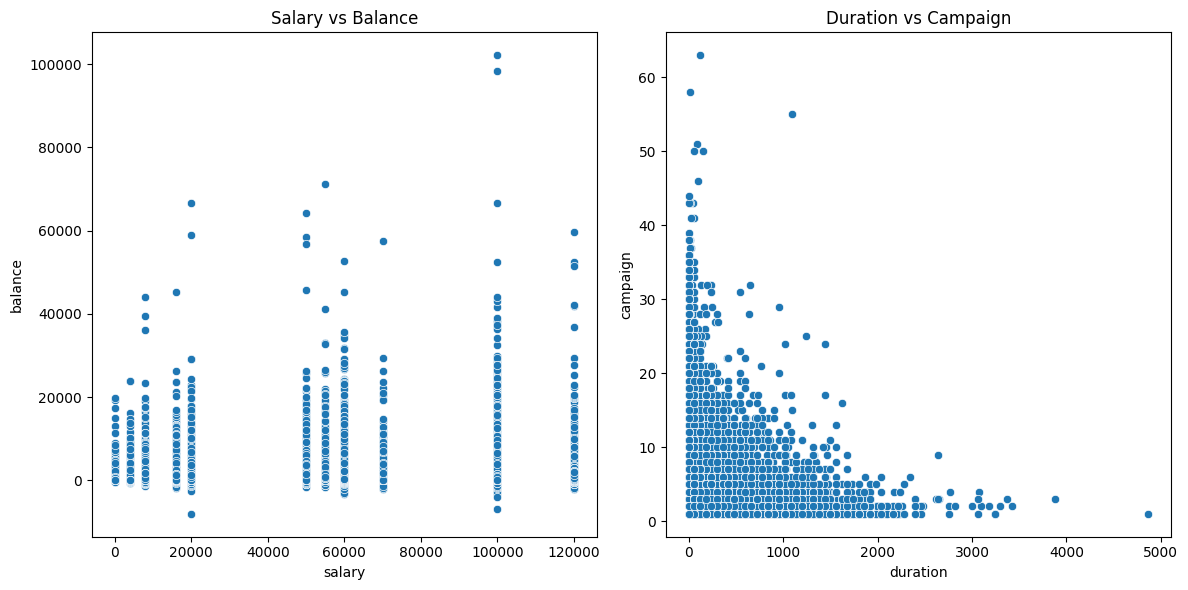

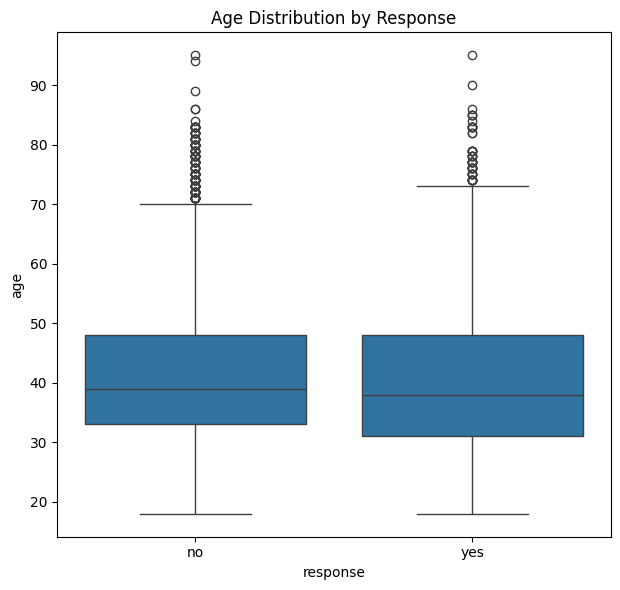

<ipython-input-1-af2d18d57df8>:138: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="job", y="salary", data=df, estimator=np.mean, ci=None, palette="viridis")
<ipython-input-1-af2d18d57df8>:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="job", y="salary", data=df, estimator=np.mean, ci=None, palette="viridis")


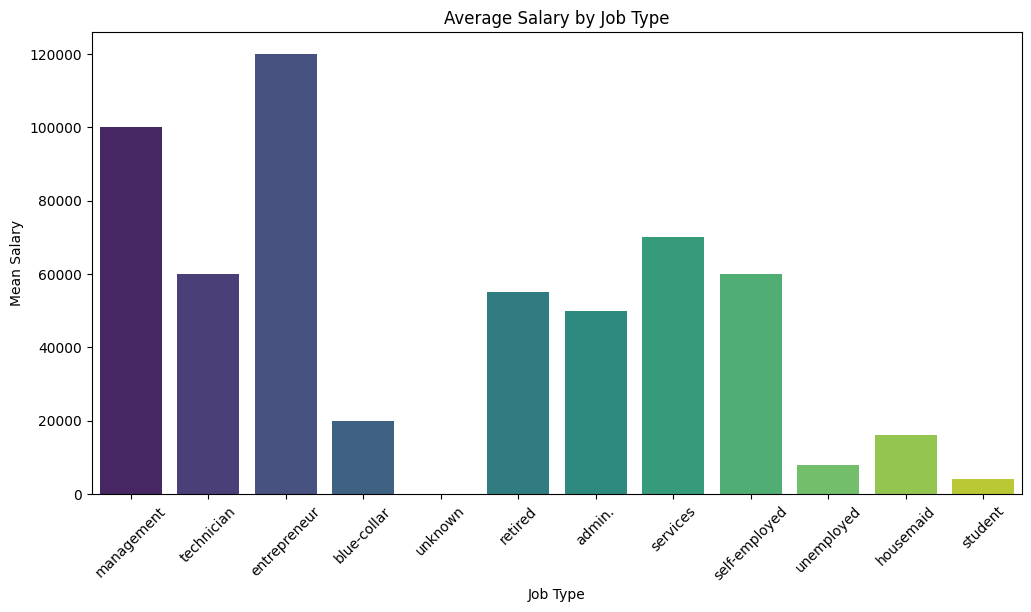

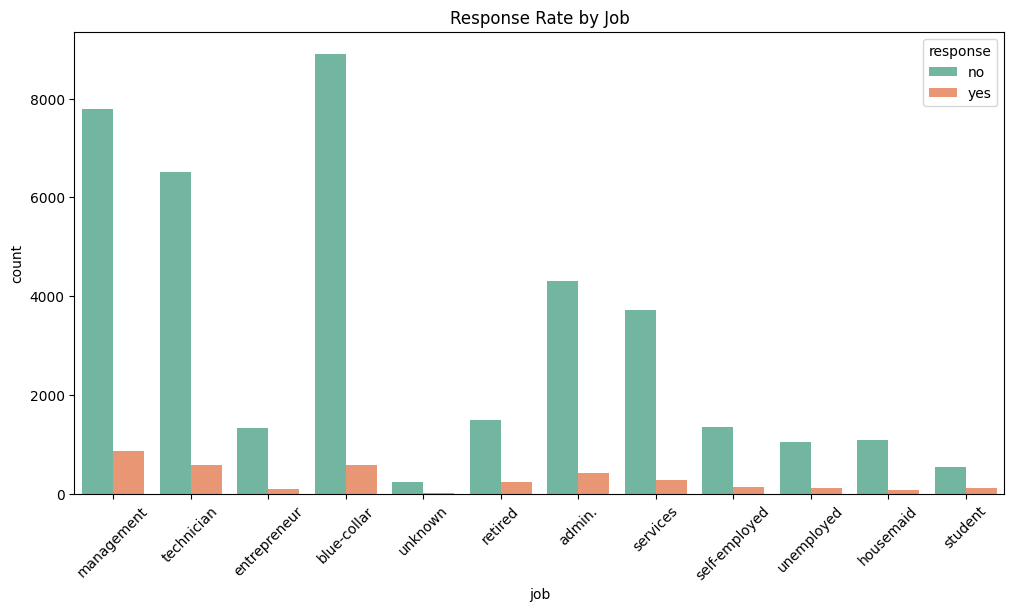

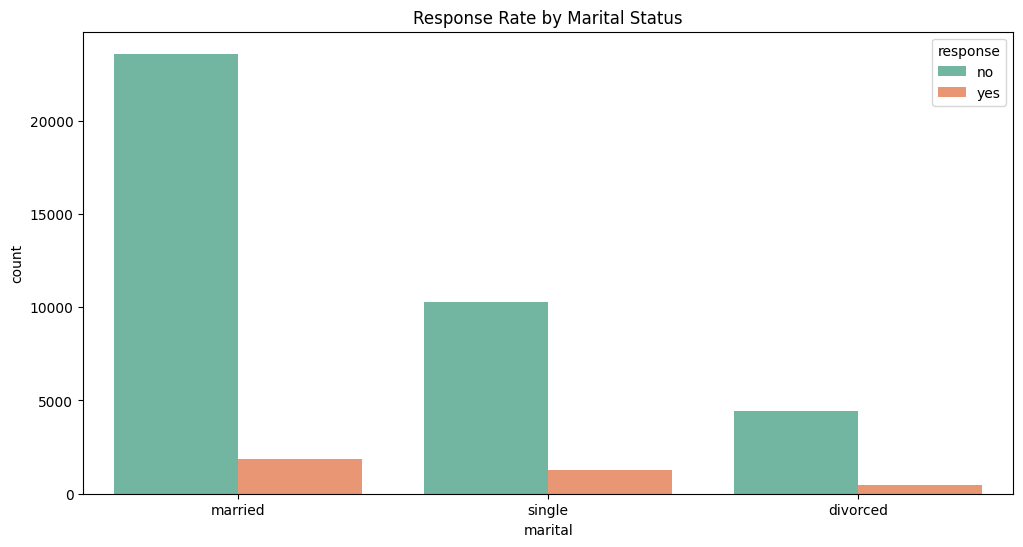

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank_marketing_updated_v1.csv', skiprows=2)
df.head()
df.shape
df.info()
df[['job' , 'edu']] = df['jobedu'].str.split(',', expand=True)
print(df)
df = df.drop(columns=['jobedu'])
df.info()
df.isnull().sum()

df[df.isnull().any(axis=1)]  # Show rows with missing values
df['age'].fillna(df['age'].median(), inplace=True)
df["month"].fillna(df["month"].mode()[0], inplace=True)
df["response"].fillna("No", inplace=True)
df.isnull().sum()  # Check if any missing values remain

import re

# Function to convert the duration into seconds
def convert_duration_to_seconds(duration):
    if isinstance(duration, str):  # Check if it's a string
        # Find the number and the unit
        num = re.findall(r'\d+', duration)
        if num:
            num = int(num[0])  # Extract the numeric value
            if 'sec' in duration:
                return num  # Already in seconds
            elif 'min' in duration:
                return num * 60  # Convert minutes to seconds
    return None  # Return None for any invalid or unrecognized duration

# Apply the conversion to the 'duration' column
df['duration'] = df['duration'].apply(convert_duration_to_seconds)

df['duration']

df.isnull().sum()

df["duration"].dtype

df.describe()

#univariate

# List of numerical features
numerical_features = ['age', 'salary', 'balance', 'duration']

# Create subplots
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=20)  # KDE to show smooth distribution
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

# Create subplots
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


# List of categorical features
categorical_features = ['job', 'marital', 'response', 'edu', 'housing', 'loan']

# Create subplots
plt.figure(figsize=(14, 8))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#Bivariate Analysis


# Scatter plots for key numerical relationships
plt.figure(figsize=(12, 6))

# Salary vs Balance
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['salary'], y=df['balance'])
plt.title("Salary vs Balance")

# Duration vs Campaign
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['duration'], y=df['campaign'])
plt.title("Duration vs Campaign")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
# Convert all categorical columns to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
# Age vs Response
plt.subplot(1, 2, 1)
sns.boxplot(x=df['response'], y=df['age'])
plt.title("Age Distribution by Response")

# # Salary vs Job
# plt.subplot(1, 2, 2)
# sns.boxplot(x=df['job'], y=df['salary'])
# plt.xticks(rotation=45)
# plt.title("Salary Distribution Across Job Types")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="job", y="salary", data=df, estimator=np.mean, ci=None, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Salary by Job Type")
plt.ylabel("Mean Salary")
plt.xlabel("Job Type")
plt.show()

# Convert all categorical columns to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)


# Response by Job
plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="response", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Response Rate by Job")
plt.show()


# Response by Marital Status
plt.figure(figsize=(12, 6))
sns.countplot(x="marital", hue="response", data=df, palette="Set2")
plt.title("Response Rate by Marital Status")
plt.show()



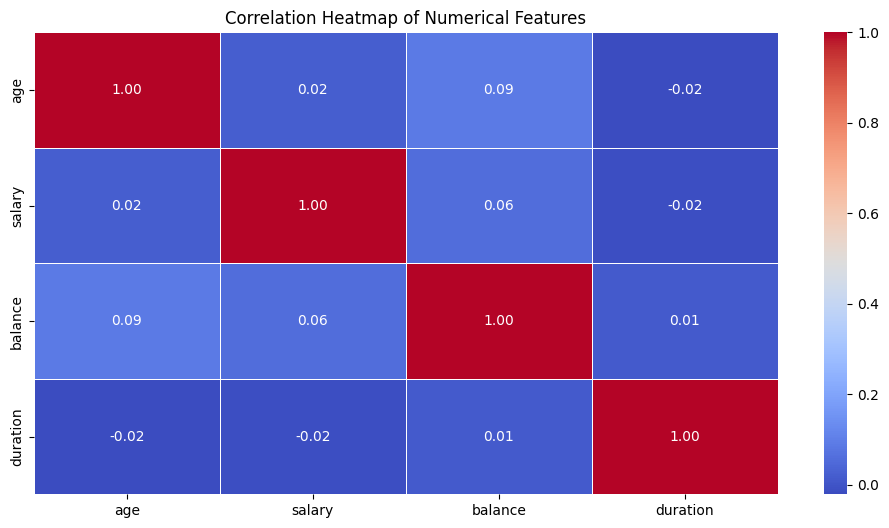

In [2]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()